<h3>Tejas Bhamare
</br></br>BA08
</br></br><center>Implement Agglomerative hierarchical clustering algorithm using appropriate dataset.</center>    
</h3>

In [124]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')

In [125]:
dataset = pd.read_csv("credit_card_data.csv")
dataset.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [126]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [127]:
dataset.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [128]:
dataset['CREDIT_LIMIT'].fillna(dataset['CREDIT_LIMIT'].median(), inplace=True)
dataset['MINIMUM_PAYMENTS'].fillna(0, inplace=True)

In [129]:
scaler = MinMaxScaler()

dataset.iloc[::, 1:] = scaler.fit_transform(dataset.iloc[::, 1:])

In [130]:
decomposer = PCA(n_components=2)

decomposed = decomposer.fit_transform(dataset.iloc[::, 1:])

In [131]:
print(f"Explained Variance: {round(sum(decomposer.explained_variance_ratio_)*100, 4)}%")

Explained Variance: 63.651%


In [132]:
reduced_dataset = pd.DataFrame(decomposed, columns=["PCA1", "PCA2"])
reduced_dataset.head()

,PCA1,PCA2
0,-0.482169,-0.097652
1,-0.608574,-0.019377
2,0.304508,0.920929
3,-0.588625,-0.005651
4,-0.554357,0.052983


In [157]:
model = AgglomerativeClustering(n_clusters=2, metric='cosine', linkage='complete')

clusters = model.fit_predict(reduced_dataset)

In [158]:
reduced_dataset['cluster'] = clusters

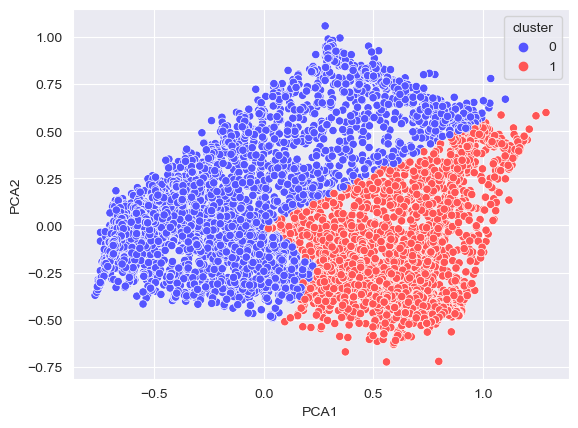

In [160]:
sns.scatterplot(x=reduced_dataset['PCA1'], y=reduced_dataset['PCA2'], hue=reduced_dataset['cluster'], palette='seismic')
plt.show()